In [2]:
import os, re, random
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
pwd

'D:\\jupy\\211014 cat vs dog'

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('cat_vs_dog/training_set/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('cat_vs_dog/test_set/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential()

#STEP 1: ADDING CONVOLUTIONAL LAYER
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))


model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Adding 2nd Convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
#STEP 3: FLATTENING
model.add(tf.keras.layers.Flatten())
#STEP 4: FULL CONNECTION
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#STEP 5: OUTPUT LAYER
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Training the CNN on the Training set and evaluating it on the Test set
model.fit(x = training_set, validation_data = test_set, epochs = 15,steps_per_epoch=50)

Epoch 1/15
50/50 [==============================] - 71s 1s/step - loss: 0.7912 - accuracy: 0.5163 - val_loss: 0.6843 - val_accuracy: 0.5699
Epoch 2/15
50/50 [==============================] - 33s 652ms/step - loss: 0.6912 - accuracy: 0.5487 - val_loss: 0.6803 - val_accuracy: 0.5230
Epoch 3/15
50/50 [==============================] - 30s 591ms/step - loss: 0.6592 - accuracy: 0.6294 - val_loss: 0.6761 - val_accuracy: 0.5872
Epoch 4/15
50/50 [==============================] - 27s 536ms/step - loss: 0.6534 - accuracy: 0.6300 - val_loss: 0.6053 - val_accuracy: 0.6782
Epoch 5/15
50/50 [==============================] - 24s 488ms/step - loss: 0.6323 - accuracy: 0.6538 - val_loss: 0.6537 - val_accuracy: 0.6199
Epoch 6/15
50/50 [==============================] - 22s 446ms/step - loss: 0.6204 - accuracy: 0.6594 - val_loss: 0.5832 - val_accuracy: 0.6975
Epoch 7/15
50/50 [==============================] - 20s 399ms/step - loss: 0.5874 - accuracy: 0.6956 - val_loss: 0.5642 - val_accuracy: 0.7133
Ep

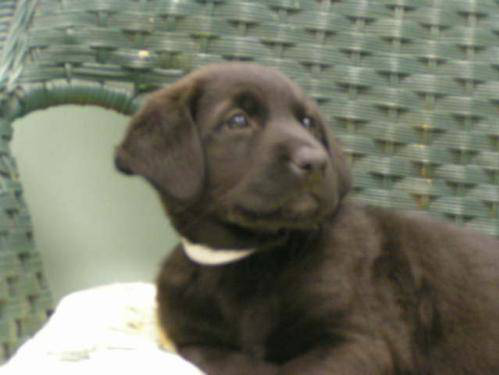

In [11]:
from keras.preprocessing import image
image.load_img('cat_vs_dog/test_set/test_set/dogs/dog.4078.jpg')

In [12]:
from keras.preprocessing import image
test_image = image.load_img('cat_vs_dog/test_set/test_set/dogs/dog.4078.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Its a Dog'
else:
  prediction = 'Its a Cat'

In [13]:
print(prediction)

Its a Dog
